# Matplotlib

- Granddaddy of all plotting libraries in Python
- Long, robust history
- Well maintained

In [2]:
!python -m pip install -U matplotlib==3.0.3

Requirement already up-to-date: matplotlib==3.0.3 in /Users/paul/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages (3.0.3)


In [5]:
# Tell Matplotlib to plot inside Jupyter Notebook
%matplotlib inline

## Basic Line Plot

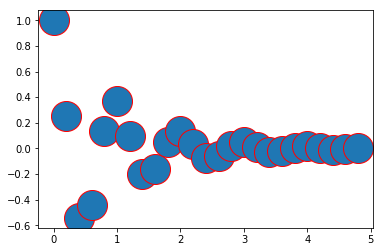

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Build a function to compute the range
def f(t):
    'A damped exponential'
    s1 = np.cos(2 * np.pi * t)
    e1 = np.exp(-t)
    return s1 * e1


t1 = np.arange(0.0, 5.0, .2)  # numpy array for domain

l = plt.plot(t1, f(t1), 'ro')  # build plot 
plt.setp(l, markersize=30)  # change size
plt.setp(l, markerfacecolor='C0')  # change color

plt.show()

## Scatter Plot

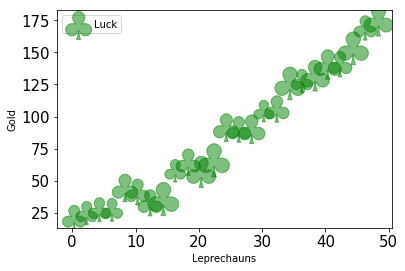

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc='upper left')
plt.show()

## Bar Chart

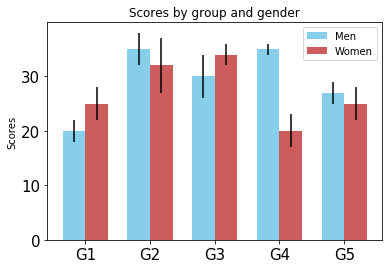

In [24]:
import numpy as np
import matplotlib.pyplot as plt

men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

plt.show()

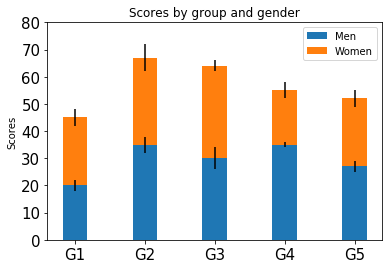

In [19]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

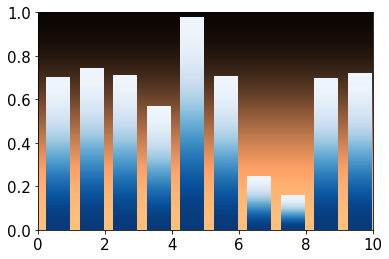

In [32]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)


def gbar(ax, x, y, width=0.5, bottom=0):
    X = [[.6, .6], [.7, .7]]
    for left, top in zip(x, y):
        right = left + width
        ax.imshow(X, interpolation='bicubic', cmap=plt.cm.Blues,
                  extent=(left, right, bottom, top), alpha=1)


xmin, xmax = xlim = 0, 10
ymin, ymax = ylim = 0, 1

fig, ax = plt.subplots()
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

X = [[.6, .6], [.7, .7]]
ax.imshow(X, interpolation='bicubic', cmap=plt.cm.copper,
          extent=(xmin, xmax, ymin, ymax), alpha=1)

N = 10
x = np.arange(N) + 0.25
y = np.random.rand(N)
gbar(ax, x, y, width=0.7)
ax.set_aspect('auto')
plt.show()

## Histogram

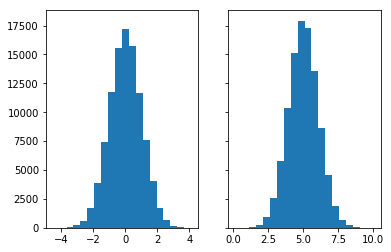

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Fixing random state for reproducibility
np.random.seed(19680801)

N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

pass  # avoid printing out the result of axs[1].hist call.

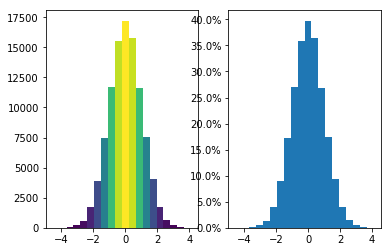

In [11]:
fig, axs = plt.subplots(1, 2)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

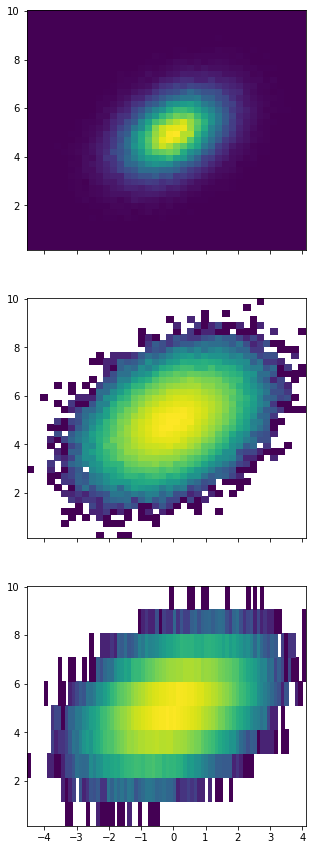

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True)

# We can increase the number of bins on each axis
axs[0].hist2d(x, y, bins=40)

# As well as define normalization of the colors
axs[1].hist2d(x, y, bins=40, norm=colors.LogNorm())

# We can also define custom numbers of bins for each axis
axs[2].hist2d(x, y, bins=(80, 10), norm=colors.LogNorm())

plt.show()

## Pie Chart

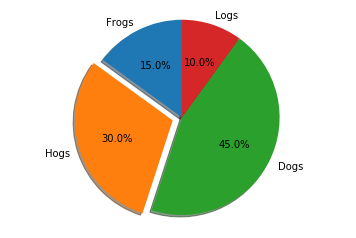

In [17]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Polar Chart

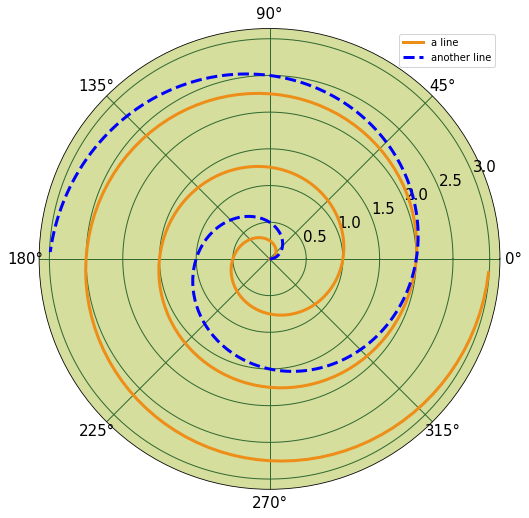

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# radar green, solid grid lines
plt.rc('grid', color='#316931', linewidth=1, linestyle='-')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# force square figure and square axes looks better for polar, IMO
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],
                  projection='polar', facecolor='#d5de9c')

r = np.arange(0, 3.0, 0.01)
theta = 2 * np.pi * r
ax.plot(theta, r, color='#ee8d18', lw=3, label='a line')
ax.plot(0.5 * theta, r, color='blue', ls='--', lw=3, label='another line')
ax.legend()

plt.show()

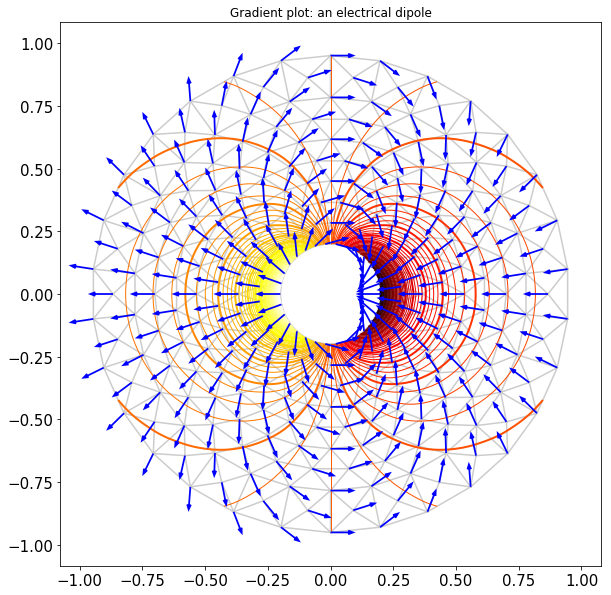

In [35]:
from matplotlib.tri import (
    Triangulation, UniformTriRefiner, CubicTriInterpolator)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


#-----------------------------------------------------------------------------
# Electrical potential of a dipole
#-----------------------------------------------------------------------------
def dipole_potential(x, y):
    """ The electric dipole potential V """
    r_sq = x**2 + y**2
    theta = np.arctan2(y, x)
    z = np.cos(theta)/r_sq
    return (np.max(z) - z) / (np.max(z) - np.min(z))


#-----------------------------------------------------------------------------
# Creating a Triangulation
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 30
n_radii = 10
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
V = dipole_potential(x, y)

# Create the Triangulation; no triangles specified so Delaunay triangulation
# created.
triang = Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

#-----------------------------------------------------------------------------
# Refine data - interpolates the electrical potential V
#-----------------------------------------------------------------------------
refiner = UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(V, subdiv=3)

#-----------------------------------------------------------------------------
# Computes the electrical field (Ex, Ey) as gradient of electrical potential
#-----------------------------------------------------------------------------
tci = CubicTriInterpolator(triang, -V)
# Gradient requested here at the mesh nodes but could be anywhere else:
(Ex, Ey) = tci.gradient(triang.x, triang.y)
E_norm = np.sqrt(Ex**2 + Ey**2)

#-----------------------------------------------------------------------------
# Plot the triangulation, the potential iso-contours and the vector field
#-----------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)

ax.triplot(triang, color='0.8')

levels = np.arange(0., 1., 0.01)
cmap = cm.get_cmap(name='hot', lut=None)
ax.tricontour(tri_refi, z_test_refi, levels=levels, cmap=cmap,
              linewidths=[2.0, 1.0, 1.0, 1.0])
# Plots direction of the electrical vector field
ax.quiver(triang.x, triang.y, Ex/E_norm, Ey/E_norm,
          units='xy', scale=10., zorder=3, color='blue',
          width=0.007, headwidth=3., headlength=4.)

ax.set_title('Gradient plot: an electrical dipole')
plt.show()

## XKCD Plot

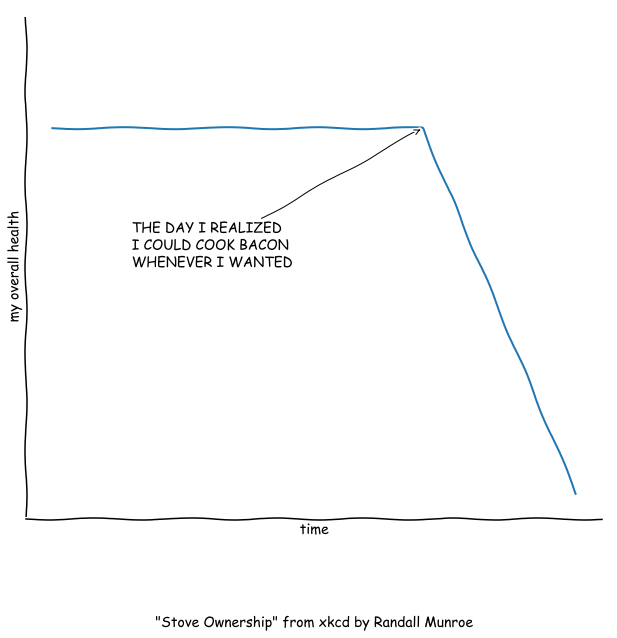

In [37]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # http://xkcd.com/418/

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

## 3D Plots

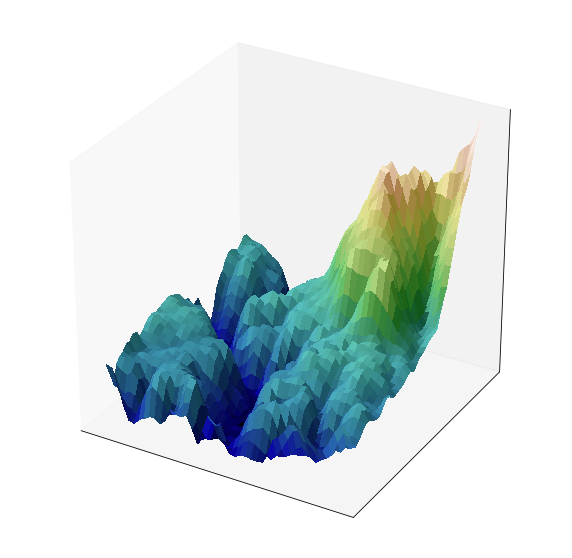

In [40]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fig.savefig("surface3d_frontpage.png", dpi=25)  # results in 160x120 px image

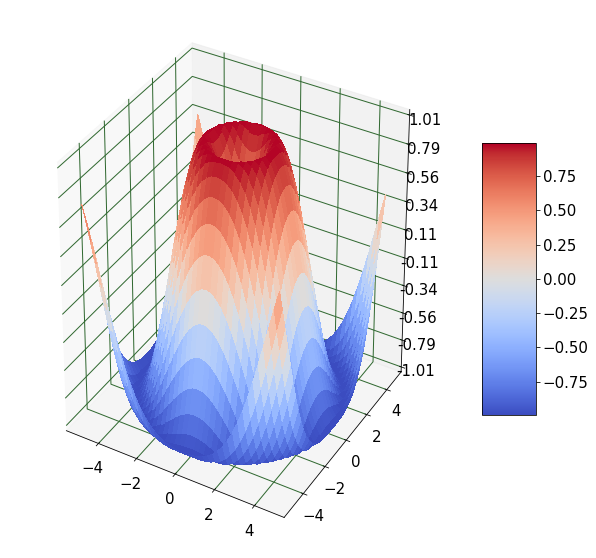

In [42]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Embedded Images

/Users/paul/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


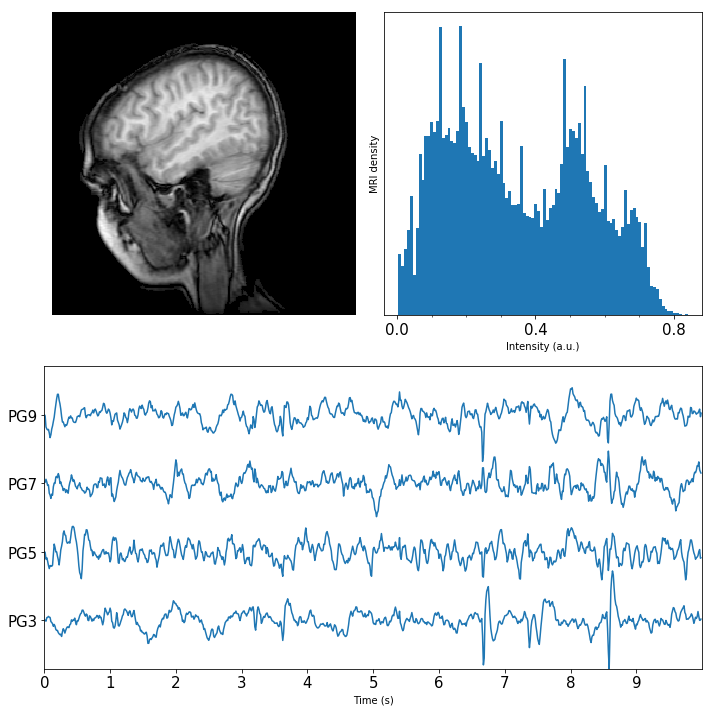

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm

from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

fig = plt.figure("MRI_with_EEG", figsize=(10, 10))

# Load the MRI data (256x256 16 bit integers)
with cbook.get_sample_data('s1045.ima.gz') as dfile:
    im = np.fromstring(dfile.read(), np.uint16).reshape((256, 256))

# Plot the MRI image
ax0 = fig.add_subplot(2, 2, 1)
ax0.imshow(im, cmap=cm.gray)
ax0.axis('off')

# Plot the histogram of MRI intensity
ax1 = fig.add_subplot(2, 2, 2)
im = np.ravel(im)
im = im[np.nonzero(im)]  # Ignore the background
im = im / (2**16 - 1)  # Normalize
ax1.hist(im, bins=100)
ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax1.minorticks_on()
ax1.set_yticks([])
ax1.set_xlabel('Intensity (a.u.)')
ax1.set_ylabel('MRI density')

# Load the EEG data
n_samples, n_rows = 800, 4
with cbook.get_sample_data('eeg.dat') as eegfile:
    data = np.fromfile(eegfile, dtype=float).reshape((n_samples, n_rows))
t = 10 * np.arange(n_samples) / n_samples

# Plot the EEG
ticklocs = []
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(10))
dmin = data.min()
dmax = data.max()
dr = (dmax - dmin) * 0.7  # Crowd them a bit.
y0 = dmin
y1 = (n_rows - 1) * dr + dmax
ax2.set_ylim(y0, y1)

segs = []
for i in range(n_rows):
    segs.append(np.column_stack((t, data[:, i])))
    ticklocs.append(i * dr)

offsets = np.zeros((n_rows, 2), dtype=float)
offsets[:, 1] = ticklocs

lines = LineCollection(segs, offsets=offsets, transOffset=None)
ax2.add_collection(lines)

# Set the yticks to use axes coordinates on the y axis
ax2.set_yticks(ticklocs)
ax2.set_yticklabels(['PG3', 'PG5', 'PG7', 'PG9'])

ax2.set_xlabel('Time (s)')


plt.tight_layout()
plt.show()